In [4]:
import numpy as np
import matplotlib.pylab as plt
# plt.rcParams["figure.figsize"] = (10, 10)

from constants import *
from plot_helper import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DESIGN KALMAN FILTER

### READ DATA

In [5]:
import json

with open('./data/data_coords.txt','r') as f:
    lines = [json.loads(line.rstrip()) for line in f]
# [row, col]
Z = np.array(list(map(lambda item: np.array([item['row'],item['col']]),lines))) 
Z.shape

(81, 2)

# Run Kalman Filter 1st Order

In [6]:
from kalman import tracker_pos_1st_order

# init tracker
tracker = tracker_pos_1st_order(R=4**2, P=20**2, Q=0.01**2, X0=None)
print(tracker)
Y_filtered = np.empty((1,4),dtype=float)
for z in Z:
    tracker.predict()
    print(tracker.mahalanobis)
    prior = tracker.x
    tracker.update(z)
    print(tracker.mahalanobis)
    poster = tracker.x
    # collect data to estimate model
    Y_filtered = np.append(Y_filtered, tracker.x.reshape(1,-1), axis=0)
Y_filtered = Y_filtered[:,[0,2]] # extract position only

KalmanFilter object
dim_x = 4
dim_z = 2
dim_u = 0
x = [[0 0 0 0]].T
P = [[400.   0.   0.   0.]
     [  0. 400.   0.   0.]
     [  0.   0. 400.   0.]
     [  0.   0.   0. 400.]]
x_prior = [[0. 0. 0. 0.]].T
P_prior = [[1. 0. 0. 0.]
           [0. 1. 0. 0.]
           [0. 0. 1. 0.]
           [0. 0. 0. 1.]]
x_post = [[0. 0. 0. 0.]].T
P_post = [[1. 0. 0. 0.]
          [0. 1. 0. 0.]
          [0. 0. 1. 0.]
          [0. 0. 0. 1.]]
F = [[1 1 0 0]
     [0 1 0 0]
     [0 0 1 1]
     [0 0 0 1]]
Q = [[2.5e-05 5.0e-05 0.0e+00 0.0e+00]
     [5.0e-05 1.0e-04 0.0e+00 0.0e+00]
     [0.0e+00 0.0e+00 2.5e-05 5.0e-05]
     [0.0e+00 0.0e+00 5.0e-05 1.0e-04]]
R = [[16.  0.]
     [ 0. 16.]]
H = [[1 0 0 0]
     [0 0 1 0]]
K = [[0. 0.]
     [0. 0.]
     [0. 0.]
     [0. 0.]]
y = [[0. 0.]].T
S = [[0. 0.]
     [0. 0.]]
SI = [[0. 0.]
      [0. 0.]]
M = [[0. 0.]
     [0. 0.]]
B = None
z = [[None None]].T
log-likelihood = -708.3964185322641
likelihood = 2.2250738585072014e-308
mahalanobis = 0.0
alpha = 1.0
inv = 

Plot data

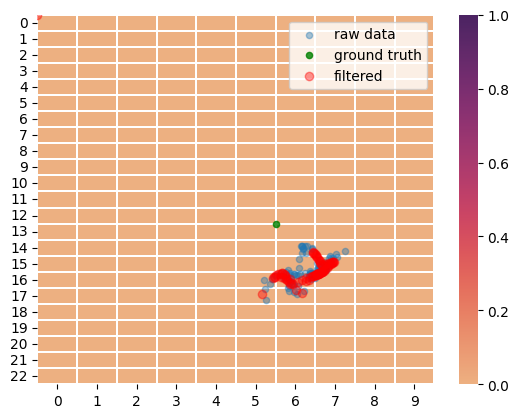

In [7]:
import seaborn as sns
ground_truth = np.array([13,6])
xs = Z[:,1]
ys = Z[:,0]

# init heatmap
fig, ax = plt.subplots(1,1)
ax = plot_radiomap(ax)
# plot raw data
ax.scatter(xs, ys, s=20, alpha=0.4, label='raw data')
ax.scatter(ground_truth[1], ground_truth[0], s=20, alpha=0.8, label='ground truth', c='g')
# plot filtered data
ax.scatter(Y_filtered[:,1], Y_filtered[:,0], alpha=0.4, label='filtered', c='r')

plt.legend()
plt.show()